https://github.com/acht7111020/CNN_object_classification/blob/master/train/Train_caltech.py 참조

In [1]:
import os
import numpy as np
import scipy.io
import scipy.misc

def imread(path):
    img = scipy.misc.imread(path).astype(np.float)
    if len(img.shape) == 2:
        img = np.transpose(np.array([img, img, img]), (2, 0, 1))
    return img
    
cwd = os.getcwd()
path = cwd + "/101_ObjectCategories"
valid_exts = [".jpg", ".gif", ".png", ".jpeg"]
print ("[%d] CATEGORIES ARE IN \n %s" % (len(os.listdir(path)), path))

categories = sorted(os.listdir(path))
ncategories = len(categories)
imgs = []
labels = []
# LOAD ALL IMAGES 
for i, category in enumerate(categories):
    iter = 0
    for f in os.listdir(path + "/" + category):
        if iter == 0:
            ext = os.path.splitext(f)[1]
            if ext.lower() not in valid_exts:
                continue
            fullpath = os.path.join(path + "/" + category, f)
            img = scipy.misc.imresize(imread(fullpath), [128,128, 3])
            img = img.astype('float32')
            img /= 255
            imgs.append(img) # NORMALIZE IMAGE 
            label_curr = i
            labels.append(label_curr)
print ("Num imgs: %d" % (len(imgs)))
print ("Num labels: %d" % (len(labels)) )
print (ncategories)

[102] CATEGORIES ARE IN 
 /home/mitssi/강의/CAL/101_ObjectCategories


/usr/local/anaconda/envs/tensorflow-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
/usr/local/anaconda/envs/tensorflow-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Num imgs: 9144
Num labels: 9144
102


In [2]:
from sklearn.model_selection import train_test_split 
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

# CIFAR_10 은 3채널로 구성된 32x32 이미지 60000장을 갖는다.
IMG_CHANNELS = 3
IMG_ROWS = 128
IMG_COLS = 128

# 상수 정의
BATCH_SIZE = 64
NB_EPOCH = 25
NB_CLASSES = 102
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

y_one_hot = np_utils.to_categorical(labels, NB_CLASSES)

# 데이터셋 불러오기
X_train, X_test, Y_train, Y_test = train_test_split(
    np.array(imgs), np.array(y_one_hot), test_size=0.1, random_state=42)
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# 신경망 정의
model = Sequential()
model.add(Conv2D(32, (4, 4), padding='same',
                 input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, (16, 16), strides=(2,2), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (16, 16), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (16, 16), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (8, 8), padding='valid'))
model.add(Activation('relu'))
model.add(Conv2D(128, (8, 8), padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()


Using TensorFlow backend.


X_train shape: (8229, 128, 128, 3)
8229 train samples
915 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      1568      
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 32)        262176    
_________________________________________________________________
activation_2 (Activation)    (None, 57, 57, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        524352    
_________________________________________________________________
activ

Train on 6583 samples, validate on 1646 samples
Epoch 1/25
6583/6583 [==============================] - 541s 82ms/step - loss: 4.4923 - acc: 0.0767 - val_loss: 4.1578 - val_acc: 0.0857
Epoch 2/25
6583/6583 [==============================] - 542s 82ms/step - loss: 4.0374 - acc: 0.0954 - val_loss: 3.9452 - val_acc: 0.1495
Epoch 3/25
6583/6583 [==============================] - 539s 82ms/step - loss: 3.7733 - acc: 0.1966 - val_loss: 3.5992 - val_acc: 0.2448
Epoch 4/25
6583/6583 [==============================] - 539s 82ms/step - loss: 3.4904 - acc: 0.2742 - val_loss: 3.3183 - val_acc: 0.3007
Epoch 5/25
6583/6583 [==============================] - 537s 82ms/step - loss: 3.2866 - acc: 0.3061 - val_loss: 3.2902 - val_acc: 0.3080
Epoch 6/25
6583/6583 [==============================] - 539s 82ms/step - loss: 3.1753 - acc: 0.3228 - val_loss: 3.1341 - val_acc: 0.3293
Epoch 7/25
6583/6583 [==============================] - 539s 82ms/step - loss: 3.0270 - acc: 0.3468 - val_loss: 3.0925 - val_acc: 

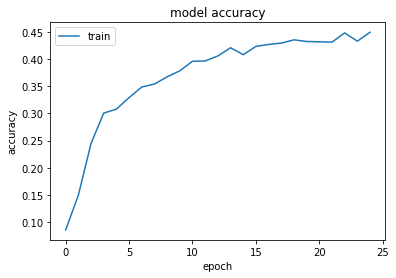

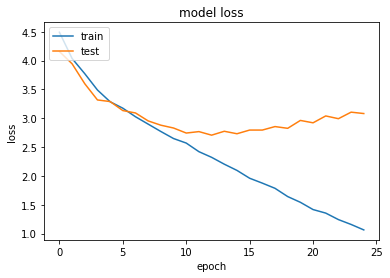

In [3]:

# 학습
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
                    epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,
                    verbose=VERBOSE)

print('Testing...')
score = model.evaluate(X_test, Y_test,
                       batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

# 모델 저장
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

# 히스토리에 있는 모든 데이터 나열
print(history.history.keys())
# 단순 정확도에 대한 히스토리 요약
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# 손실에 대한 히스토리 요약
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()